<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_8)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2.8'

In [6]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.8_n20.csv')

In [7]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.644492,77.894610,188.779098,300.318200,316.951918,-16.633718
1,0.0,1.0,26.366540,60.980926,-72.447757,24.899709,258.333206,-233.433497
2,0.0,2.0,64.791385,82.782730,-13.278912,144.295203,174.954871,-30.659667
3,0.0,3.0,99.647616,46.824468,155.691985,312.164069,-59.846771,372.010840
4,0.0,4.0,21.501393,31.575812,-122.671349,-59.594144,192.799143,-252.393287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,97.889772,28.811952,76.963330,213.665055,116.840531,96.824524
19996,999.0,16.0,27.032950,30.383104,-89.582899,-22.166846,183.230262,-205.397108
19997,999.0,17.0,23.189702,23.365608,-41.790894,14.764416,190.426075,-175.661658
19998,999.0,18.0,62.053021,66.480733,194.996963,333.530716,131.755083,201.775633


In [8]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    23.644492  77.894610  188.779098  300.318200  316.951918   
      1.0    26.366540  60.980926  -72.447757   24.899709  258.333206   
      2.0    64.791385  82.782730  -13.278912  144.295203  174.954871   
      3.0    99.647616  46.824468  155.691985  312.164069  -59.846771   
      4.0    21.501393  31.575812 -122.671349  -59.594144  192.799143   
...                ...        ...         ...         ...         ...   
999.0 15.0   97.889772  28.811952   76.963330  213.665055  116.840531   
      16.0   27.032950  30.383104  -89.582899  -22.166846  183.230262   
      17.0   23.189702  23.365608  -41.790894   14.764416  190.426075   
      18.0   62.053021  66.480733  194.996963  333.530716  131.755083   
      19.0   85.773013  71.422529  -48.235063  118.960479  106.763128   

                  e_hat  
rep   index              
0.0   0.0    -16.633718  
      1.0   -233.433497  
      2.0    -30.659667  
      3.0    372.010840  
      4.0   -252.393287  
...                 ...  
999.0 15.0    96.824524  
      16.0  -205.397108  
      17.0  -175.661658  
      18.0   201.775633  
      19.0    12.197351  

[20000 rows x 6 columns]

In [9]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    23.644492  77.894610  188.779098  300.318200  316.951918   
      1.0    26.366540  60.980926  -72.447757   24.899709  258.333206   
      2.0    64.791385  82.782730  -13.278912  144.295203  174.954871   
      3.0    99.647616  46.824468  155.691985  312.164069  -59.846771   
      4.0    21.501393  31.575812 -122.671349  -59.594144  192.799143   
...                ...        ...         ...         ...         ...   
999.0 15.0   97.889772  28.811952   76.963330  213.665055  116.840531   
      16.0   27.032950  30.383104  -89.582899  -22.166846  183.230262   
      17.0   23.189702  23.365608  -41.790894   14.764416  190.426075   
      18.0   62.053021  66.480733  194.996963  333.530716  131.755083   
      19.0   85.773013  71.422529  -48.235063  118.960479  106.763128   

                  e_hat  
rep   index              
0.0   0.0    -16.633718  
      1.0   -233.433497  
      2.0    -30.659667  
      3.0    372.010840  
      4.0   -252.393287  
...                 ...  
999.0 15.0    96.824524  
      16.0  -205.397108  
      17.0  -175.661658  
      18.0   201.775633  
      19.0    12.197351  

[20000 rows x 6 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,23.644492,77.894610,188.779098,300.318200,316.951918,-16.633718
1,0.0,1.0,26.366540,60.980926,-72.447757,24.899709,258.333206,-233.433497
2,0.0,2.0,64.791385,82.782730,-13.278912,144.295203,174.954871,-30.659667
3,0.0,3.0,99.647616,46.824468,155.691985,312.164069,-59.846771,372.010840
4,0.0,4.0,21.501393,31.575812,-122.671349,-59.594144,192.799143,-252.393287
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,97.889772,28.811952,76.963330,213.665055,116.840531,96.824524
19996,999.0,16.0,27.032950,30.383104,-89.582899,-22.166846,183.230262,-205.397108
19997,999.0,17.0,23.189702,23.365608,-41.790894,14.764416,190.426075,-175.661658
19998,999.0,18.0,62.053021,66.480733,194.996963,333.530716,131.755083,201.775633


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    23.644492  77.894610  188.779098  300.318200  316.951918   
      1.0    26.366540  60.980926  -72.447757   24.899709  258.333206   
      2.0    64.791385  82.782730  -13.278912  144.295203  174.954871   
      3.0    99.647616  46.824468  155.691985  312.164069  -59.846771   
      4.0    21.501393  31.575812 -122.671349  -59.594144  192.799143   
...                ...        ...         ...         ...         ...   
999.0 15.0   97.889772  28.811952   76.963330  213.665055  116.840531   
      16.0   27.032950  30.383104  -89.582899  -22.166846  183.230262   
      17.0   23.189702  23.365608  -41.790894   14.764416  190.426075   
      18.0   62.053021  66.480733  194.996963  333.530716  131.755083   
      19.0   85.773013  71.422529  -48.235063  118.960479  106.763128   

                  e_hat  
rep   index              
0.0   0.0    -16.633718  
      1.0   -233.433497  
      2.0    -30.659667  
      3.0    372.010840  
      4.0   -252.393287  
...                 ...  
999.0 15.0    96.824524  
      16.0  -205.397108  
      17.0  -175.661658  
      18.0   201.775633  
      19.0    12.197351  

[20000 rows x 6 columns]

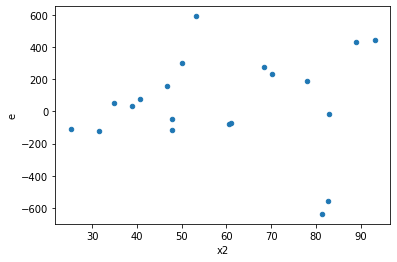

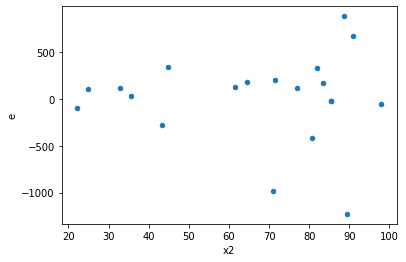

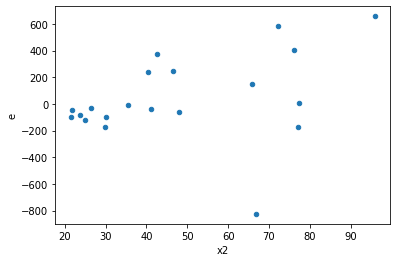

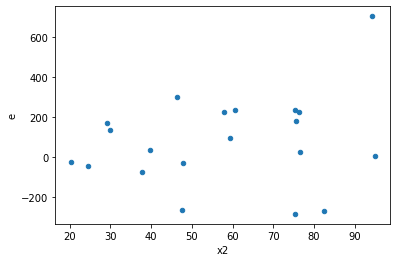

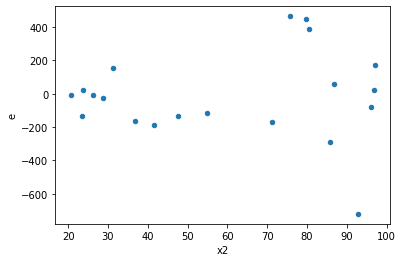

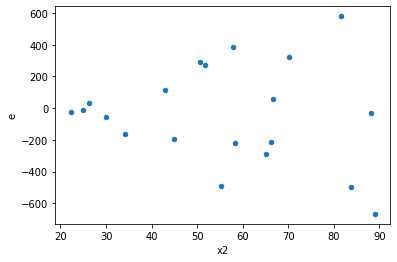

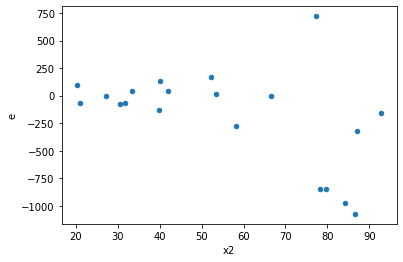

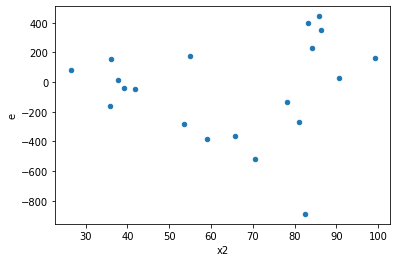

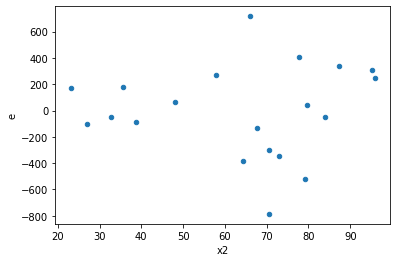

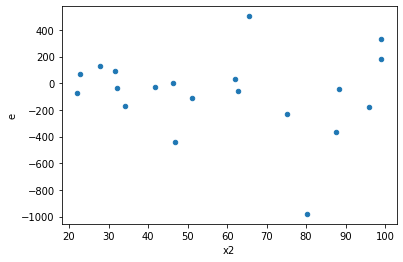

In [13]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
9.0,11.0,5.0,444086.5337681159,486520.32875926804,40371.50306982872,97304.0657518536,2.410216572406315,0.34215935314073076,0.8289203234296346,0.17107967657036538,Reject001=1 : Homoscedasticity
14.0,9.0,7.0,854624.1452254883,831573.6875269783,94958.23835838759,118796.24107528261,1.2510366991742894,0.785081579852821,0.6074592100735895,0.3925407899264105,Reject001=1 : Homoscedasticity
16.0,9.0,7.0,172568.21034867666,616374.1925301659,19174.245594297405,88053.45607573798,4.592277471501975,0.05690924729412883,0.9715453763529356,0.028454623647064414,Reject001=1 : Homoscedasticity
21.0,7.0,9.0,257751.99308974767,1417004.691797932,36821.71329853538,157444.96575532577,4.275872892682272,0.04727864754822608,0.976360676225887,0.02363932377411304,Reject001=1 : Homoscedasticity
23.0,8.0,8.0,232815.05525731258,678690.7362536923,29101.881907164072,84836.34203171154,2.915149690399479,0.15133066242702609,0.924334668786487,0.07566533121351304,Reject001=1 : Homoscedasticity
25.0,9.0,7.0,775421.9111833458,678244.8419833457,86157.99013148287,96892.1202833351,1.124586589537096,0.8973023261111956,0.5513488369444022,0.4486511630555978,Reject001=1 : Homoscedasticity
26.0,10.0,6.0,821296.9568069145,2515148.9310834347,82129.69568069145,419191.4885139058,5.104018528738528,0.05882211247119673,0.9705889437644016,0.029411056235598365,Reject001=1 : Homoscedasticity
38.0,6.0,10.0,235104.73621100158,4133906.1826500027,39184.1227018336,413390.6182650003,10.549952117357368,0.0015599648969411017,0.9992200175515294,0.0007799824484705509,Reject001=0 : Heteroscedasticity
39.0,11.0,5.0,243930.9781690085,489411.2572710025,22175.543469909866,97882.25145420051,4.413973059420958,0.11354503978566632,0.9432274801071668,0.05677251989283316,Reject001=1 : Homoscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,11.0,670744.4841456123,278269.9824951416,134148.89682912247,25297.271135921965,0.18857606535628374,0.07835279799169384,Reject001=1 : Homoscedasticity
1.0,10.0,6.0,2327200.37175148,619953.0243188817,232720.03717514797,103325.50405314694,0.4439905790122528,0.24563090797403145,Reject001=1 : Homoscedasticity
2.0,8.0,8.0,972531.9947012118,131971.64337132833,121566.49933765148,16496.45542141604,0.1356990249065005,0.01056966977269069,Reject001=1 : Homoscedasticity
3.0,9.0,7.0,673874.5219999355,206946.48725781214,74874.94688888172,29563.783893973163,0.3948421350848815,0.19493264825379863,Reject001=1 : Homoscedasticity
4.0,8.0,8.0,1091978.8663777912,60359.98519299089,136497.3582972239,7544.998149123861,0.05527578147479293,0.00046355845918842614,Reject001=0 : Heteroscedasticity
5.0,12.0,4.0,1724486.4569704798,45890.1417115999,143707.20474753997,11472.535427899975,0.07983270879184201,0.0006078970763529982,Reject001=0 : Heteroscedasticity
6.0,7.0,9.0,2312165.723859414,111253.73882684993,330309.3891227734,12361.52653631666,0.03742408464120884,0.00026231340258899255,Reject001=0 : Heteroscedasticity
7.0,9.0,7.0,1528685.9404591667,36347.471097796195,169853.99338435184,5192.495871113742,0.030570349084251276,2.131027012230778e-05,Reject001=0 : Heteroscedasticity
8.0,11.0,5.0,1830637.1150358415,203459.66233060745,166421.55591234923,40691.93246612149,0.24451118872817826,0.04825171169610381,Reject001=1 : Homoscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      752
Reject001=0 : Heteroscedasticity    248
Name: Result_test, dtype: int64